## Exploratory factor analysis

1. prepare data
2. select observed variables
3. choose the number of factors 
4. estimate factor loadings
5. apply an appropriate rotation
6. study the estimated factor loadings and see if you can give meaningful labels to the factors
7. predict the values of latent variables

In [1]:
### install factor_analyzer if it has not been installed yet
# !pip install factor_analyzer

### Load the necessary modules

In [2]:
import os
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

### Load the data

The data used for this demonstration is obtained from the 2021 Canadian Election Study (Stephenson, Laura B.; Harrell, Allison; Rubenson, Daniel; Loewen, Peter John, 2023, "Canadian Election Study 2021", https://doi.org/10.5683/SP3/MMXTFC). It can be accessed here:

[https://borealisdata.ca/dataset.xhtml?persistentId=doi:10.5683/SP3/MMXTFC](https://borealisdata.ca/dataset.xhtml?persistentId=doi:10.5683/SP3/MMXTFC)

In [3]:
ds0=pd.read_csv('CES2021tab.tab',sep='\t')
# ds0.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_21860\2796571676.py:1: DtypeWarning: Columns (20,604,616,626,628,635,674,680,719,739,763,895,1071,1080) have mixed types. Specify dtype option on import or set low_memory=False.
  ds0=pd.read_csv('CES2021tab.tab',sep='\t')


In [4]:
## here is a dictionary with the variables I want to use and their labels
pos_vars_dict = {'pes21_paymed':'People who are willing to pay should be allowed to get medical treatment sooner.',
            'pes21_envirojob':'When there is a conflict between protecting the environment and creating jobs, jobs should come first.',
            'pes21_govtcare':'The government does not care much about what people like me think.', 
            'pes21_famvalues':'This country would have many fewer problems if there was more emphasis on traditional family values.',
            'pes21_bilingualism':'We have gone too far in pushing bilingualism in Canada.',
            'pes21_equalrights':'We have gone too far in pushing equal rights in this country.',
            'pes21_fitin':'Too many recent immigrants just dont want to fit in to Canadian society.',
            'pes21_immigjobs':'Immigrants take jobs away from other Canadians.',
            'pes21_gap':'How much do you think should be done to reduce the gap between the rich and the poor in Canada?'
           }
pop_dict = {
    'pes21_populism_2': "What people call compromise in politics is really just selling out on one's principles",
    'pes21_populism_3': "Most politicians do not care about the people",
    'pes21_populism_4': "Most politicians are trustworthy",
    'pes21_populism_6': "Having a strong leader in government is good for Canada even if the leader bends the rules to get things done",
    'pes21_populism_7': "The people, and not politicians, should make our most important policy decisions",
    'pes21_populism_8': "Most politicians care only about the interests of the rich and powerful"
}
can_id_dict = {
    'pes21_can_id_1': "To have been born in Canada",
    'pes21_can_id_2': "For your grandparents to have been born in Canada",
    'pes21_can_id_3': "To follow Canada's customs and traditions",
    'pes21_can_id_4': "To follow Canada's institutions and laws",
    'pes21_can_id_5': "To care about the needs of other Canadians",
    'pes21_can_id_6': "To contribute one's fair share of taxes"
}

### Some data cleaning

In [5]:
ds = ds0.set_index(['cps21_ResponseId'])
ds_pos = ds[list(pos_vars_dict.keys())].replace(6, np.NaN).dropna()

### Run factor analysis with 2 factors for now

In [6]:
nfactors = 2
X = ds_pos[list(pos_vars_dict.keys())].to_numpy()

In [7]:
fa = FactorAnalyzer(n_factors = nfactors)

In [8]:
fa.loadings_

In [9]:
fa.fit(X)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

### Make a decision about the number of factors

A common way to determine the number of factors is to count the number of eigenvalues above 1. We should also look at the screeplot.

In [10]:
evs = fa.get_eigenvalues()
print('Eigenvalues of the correlation matrix: ', evs[0])

Eigenvalues of the correlation matrix:  [3.55260861 1.14142382 0.80578014 0.74639203 0.68078025 0.64311968
 0.60174932 0.4700695  0.35807666]


<Figure size 640x480 with 0 Axes>

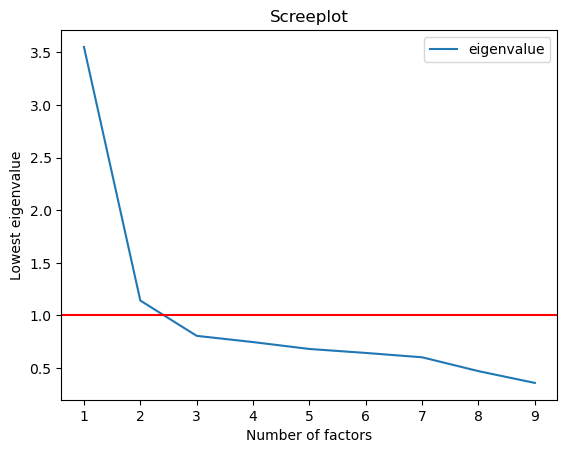

In [11]:
evs_df = pd.DataFrame({'eigenvalue':evs[0], 'nfactors':range(len(evs[0]))})
evs_df['nfactors'] = evs_df['nfactors'] + 1
plt.figure()
ax= evs_df.plot(x='nfactors', y='eigenvalue', kind='line')
plt.axhline(y=1, color='red')
plt.title('Screeplot')
plt.xlabel('Number of factors')
plt.ylabel('Lowest eigenvalue')
plt.show()

### Orthogonal and oblique rotations

Rotations *rotate* the space with latent variables by adjusting the loadings to satisfy a particular desirable criterion.

Orthogonal rotations (such as varimax) keep the angles right (and the latent variables uncorrelated).

Oblique rotations (such as oblimin) allow the angles to change (and the latent variables to be correlated).

In [12]:
## varimax rotation
fa = FactorAnalyzer(n_factors = nfactors, rotation="varimax")
fa.fit(X)
## oblimin rotation
fa_obl = FactorAnalyzer(n_factors = nfactors, rotation="oblimin")
fa_obl.fit(X)

FactorAnalyzer(n_factors=2, rotation='oblimin', rotation_kwargs={})

In [13]:
pd.DataFrame(fa.loadings_, index=pos_vars_dict.values())

,0,1
People who are willing to pay should be allowed to get medical treatment sooner.,0.141611,0.499768
"When there is a conflict between protecting the environment and creating jobs, jobs should come first.",0.382092,0.491176
The government does not care much about what people like me think.,0.401039,0.140041
This country would have many fewer problems if there was more emphasis on traditional family values.,0.547289,0.336436
We have gone too far in pushing bilingualism in Canada.,0.422518,0.309449
We have gone too far in pushing equal rights in this country.,0.559408,0.430313
Too many recent immigrants just dont want to fit in to Canadian society.,0.761129,0.182460
Immigrants take jobs away from other Canadians.,0.727622,0.101686
How much do you think should be done to reduce the gap between the rich and the poor in Canada?,0.100208,0.558003


In [14]:
pd.DataFrame(fa_obl.loadings_, index=pos_vars_dict.values())

,0,1
People who are willing to pay should be allowed to get medical treatment sooner.,-0.002381,0.520650
"When there is a conflict between protecting the environment and creating jobs, jobs should come first.",0.268752,0.441035
The government does not care much about what people like me think.,0.402606,0.040774
This country would have many fewer problems if there was more emphasis on traditional family values.,0.502779,0.219020
We have gone too far in pushing bilingualism in Canada.,0.372199,0.224977
We have gone too far in pushing equal rights in this country.,0.486172,0.321031
Too many recent immigrants just dont want to fit in to Canadian society.,0.790847,-0.016286
Immigrants take jobs away from other Canadians.,0.779380,-0.097347
How much do you think should be done to reduce the gap between the rich and the poor in Canada?,-0.067279,0.598163


In [15]:
print('correlation between latent variables:\n', fa_obl.phi_)

correlation between latent variables:
 [[1.        0.5083485]
 [0.5083485 1.       ]]


### Variance explained

In [16]:
fa_obl.get_factor_variance()

(array([2.09940614, 1.03643653]),
 array([0.23326735, 0.11515961]),
 array([0.23326735, 0.34842696]))

### Computing scores

In [17]:
pred_pos = pd.DataFrame(fa_obl.transform(X), index=ds_pos.index, columns=['social','economic'])
pred_pos.head()

,social,economic
cps21_ResponseId,,
R_00Wyqmxv6ek6e3L,0.163123,-0.132742
R_00nCP7AU1k5Xlkd,0.379023,-0.369447
R_00uY5mK8nzhcsJb,0.872668,-0.723364
R_01hIp1wTl555aZX,0.213416,-0.274499
R_03s5SOr9Azv5129,-0.357996,-0.450541


<Axes: xlabel='economic', ylabel='social'>

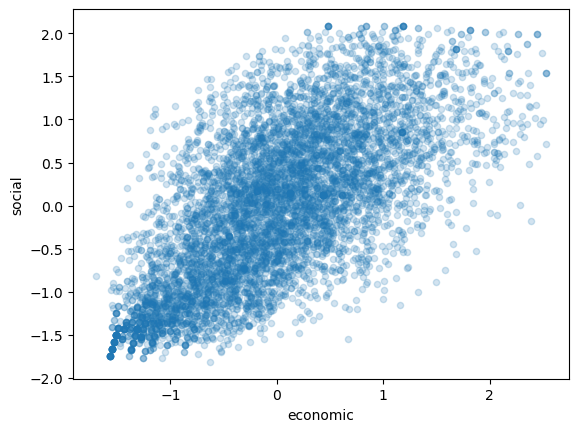

In [18]:
pred_pos.plot(x='economic',y='social', kind='scatter', alpha=0.2)